In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection

In [2]:

# File Paths
wvs_path = "C://Users//PC//Desktop//Happiness-Analysis//data//WVS_Time_Series_1981-2022_csv_v5_0.csv"
df = pd.read_csv(wvs_path)
df


,version,doi,S001,S002VS,S003,COUNTRY_ALPHA,COW_NUM,COW_ALPHA,S004,S006,...,Y023A,Y023B,Y023C,Y024A,Y024B,Y024C,survself,tradrat5,TradAgg,SurvSAgg
0,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,1,...,0.000000,0.444444,0.444444,0.33,0.0,0.165,-1.011276,0.160847,0.158964,-1.792410
1,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,2,...,0.111111,0.444444,0.444444,0.33,0.0,0.165,-0.688773,0.409283,0.558946,-1.208679
2,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,3,...,0.000000,0.444444,0.444444,0.33,0.5,0.415,NaN,NaN,NaN,NaN
3,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,4,...,0.000000,0.333333,0.333333,0.33,0.0,0.165,-1.319863,0.733956,1.081669,-2.350952
4,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,5,...,0.000000,0.333333,0.333333,0.00,0.5,0.250,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443483,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,7,716,ZWE,552,ZIM,-4,716071211,...,0.000000,0.000000,0.000000,0.66,0.5,0.580,-0.738923,-0.774148,-1.346378,-1.299450
443484,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,7,716,ZWE,552,ZIM,-4,716071212,...,0.000000,0.000000,0.777778,1.00,0.0,0.500,-0.445039,0.282275,0.354463,-0.767520
443485,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,7,716,ZWE,552,ZIM,-4,716071213,...,0.000000,0.000000,0.000000,0.33,0.0,0.165,-0.925464,-0.436454,-0.802691,-1.637090
443486,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,7,716,ZWE,552,ZIM,-4,716071214,...,0.000000,0.000000,0.000000,0.00,0.0,0.000,-2.398929,1.218936,1.862486,-4.304062


#

### EDA is about understanding the nuances of your dataset, its strengths, limitations, and the stories it’s ready to tell.

In [5]:
df.shape

(443488, 1046)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443488 entries, 0 to 443487
Columns: 1046 entries, version to SurvSAgg
dtypes: float64(42), int64(1000), object(4)
memory usage: 3.5+ GB


In [4]:
df.describe()

,S001,S002VS,S003,COW_NUM,S004,S006,S007,S008,MODE,S010,...,Y023A,Y023B,Y023C,Y024A,Y024B,Y024C,survself,tradrat5,TradAgg,SurvSAgg
count,443488.0,443488.000000,443488.000000,443488.000000,443488.000000,4.434880e+05,4.434880e+05,4.434880e+05,443488.000000,443488.000000,...,396143.000000,415428.000000,420353.000000,420417.000000,393851.000000,387903.000000,294265.000000,294265.000000,294265.000000,294265.000000
mean,2.0,4.894973,458.207027,458.034283,-3.132745,9.819729e+07,3.698946e+09,1.337927e+05,5.064953,27.805219,...,0.258468,0.270678,0.412207,0.361813,0.362123,0.361181,-0.057526,-0.129011,-0.307708,-0.066122
std,0.0,1.665920,257.432004,259.854563,1.916383,2.208292e+08,2.857042e+09,2.517225e+06,1.811534,54.178184,...,0.346944,0.321364,0.347012,0.324720,0.386872,0.281807,0.953873,0.995313,1.602454,1.726510
min,2.0,1.000000,8.000000,2.000000,-4.000000,1.000000e+00,2.072000e+07,-5.000000e+00,1.000000,-5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.263622,-2.263708,-3.744570,-5.869156
25%,2.0,3.000000,233.000000,230.000000,-4.000000,4.620000e+02,7.603202e+08,-4.000000e+00,6.000000,-4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.165000,-0.728028,-0.894770,-1.540579,-1.279731
50%,2.0,5.000000,440.000000,446.000000,-4.000000,9.310000e+02,3.560623e+09,-4.000000e+00,6.000000,-4.000000,...,0.000000,0.111111,0.444444,0.330000,0.500000,0.330000,-0.148760,-0.233597,-0.476092,-0.231256
75%,2.0,6.000000,704.000000,704.000000,-4.000000,2.234000e+03,6.430222e+09,-4.000000e+00,6.000000,56.000000,...,0.444444,0.444444,0.666667,0.660000,0.500000,0.580000,0.529703,0.536938,0.764470,0.996762
max,2.0,7.000000,909.000000,920.000000,2.000000,9.090704e+08,8.940522e+09,9.791342e+07,7.000000,6012.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.290823,4.404086,6.990578,5.994389


In [12]:
print(df["S020"])

0         1998
1         1998
2         1998
3         1998
4         1998
          ... 
443483    2020
443484    2020
443485    2020
443486    2020
443487    2020
Name: S020, Length: 443488, dtype: int64


##

## Handling missing values

In [13]:
# in the survey. -5 value means "Missing; Not available "
df.replace(-5,np.nan,inplace=True)

<Axes: >

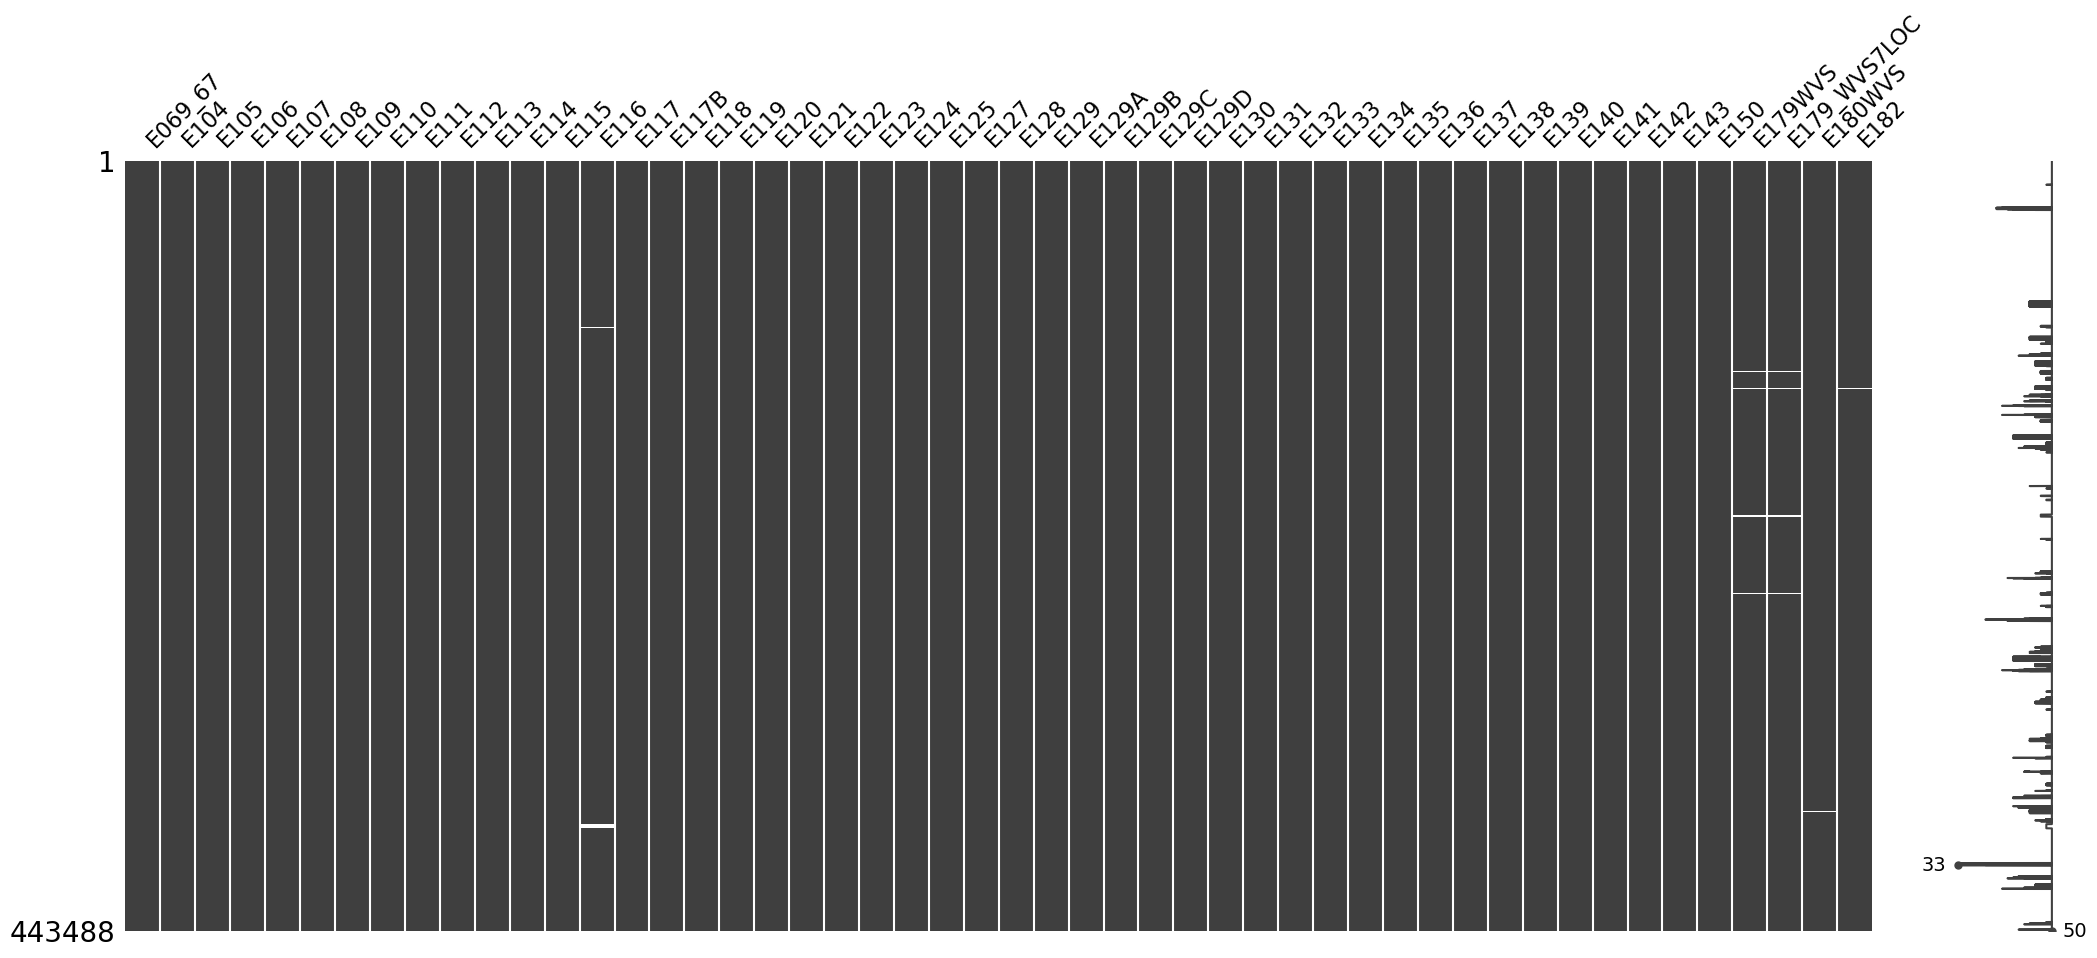

In [21]:
import missingno as msno
msno.matrix(df.iloc[:,500:550])

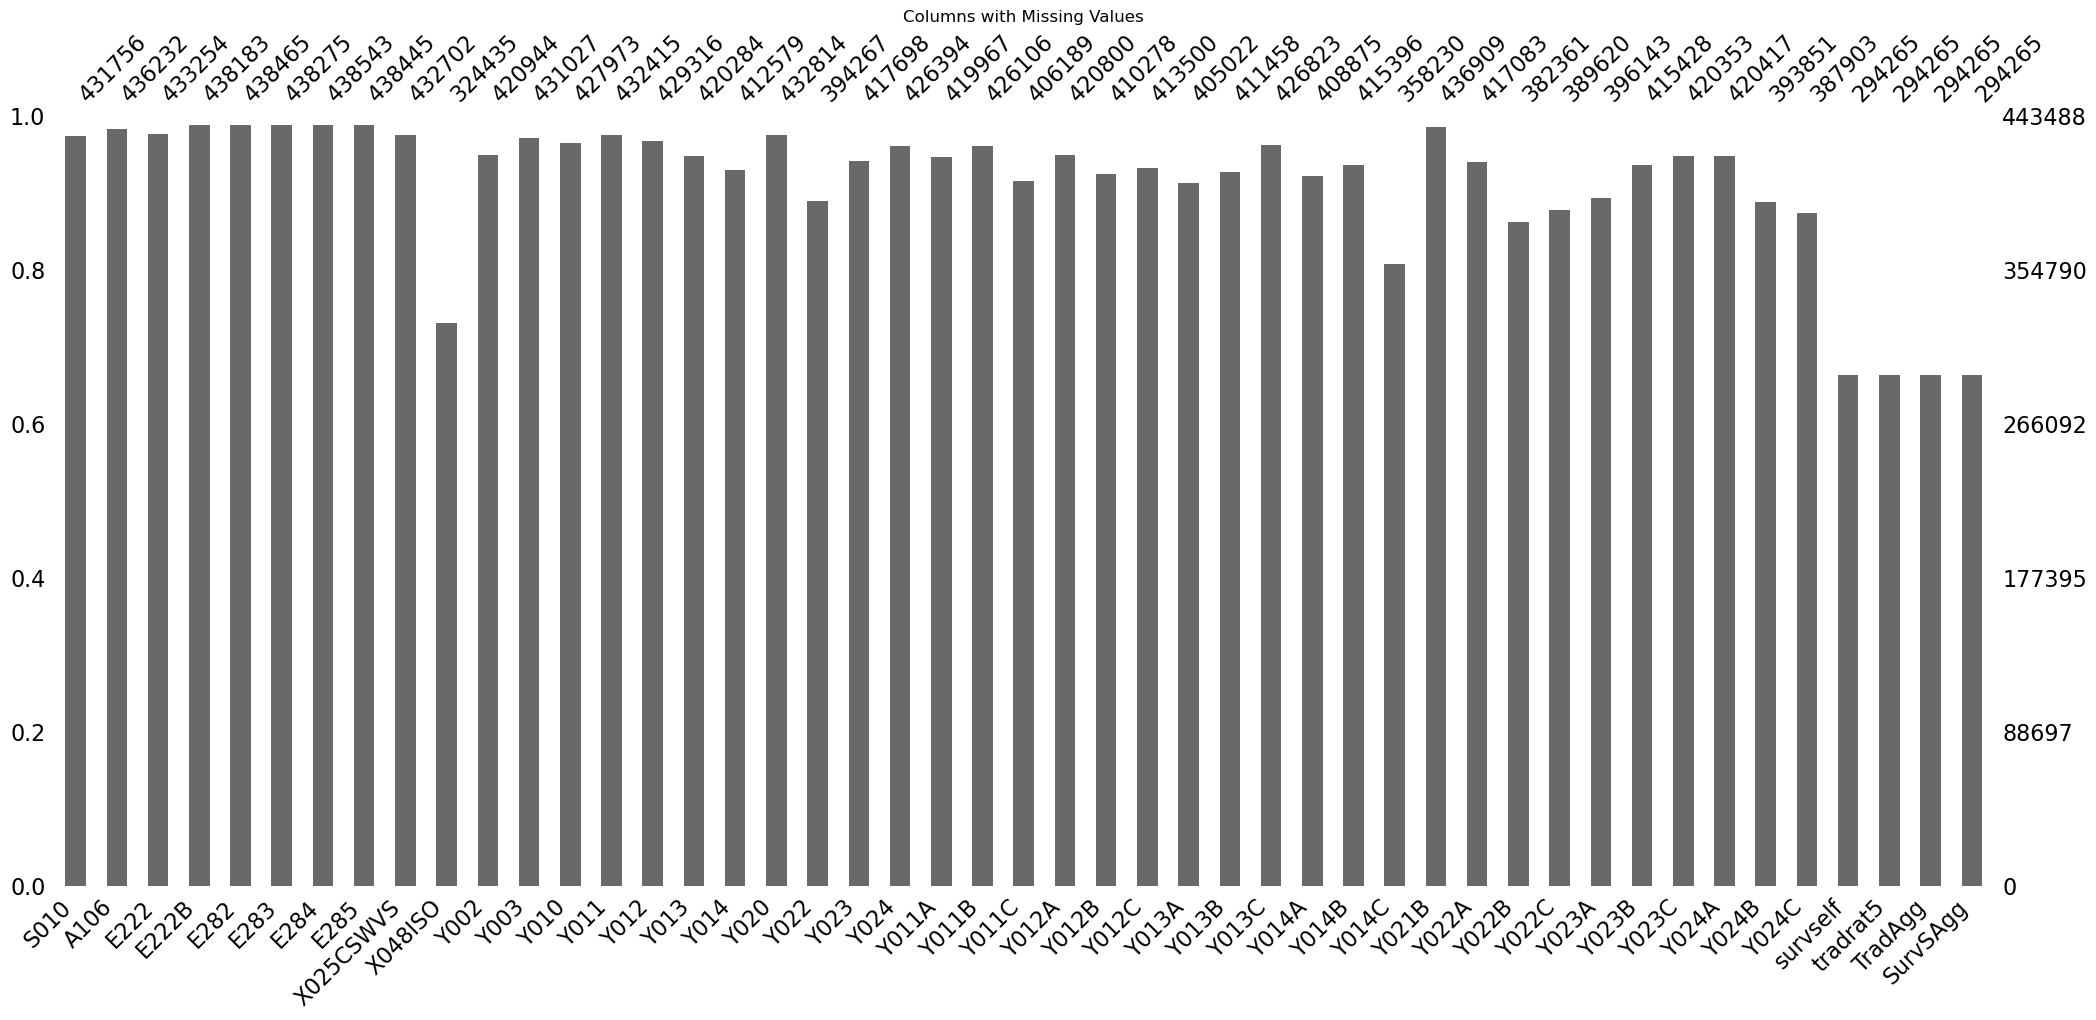

In [29]:
missing_percent = df.isnull().mean()
columns_with_missing = missing_percent[missing_percent > 0.01].index

# Step 2: Visualize columns with missing data
msno.bar(df[columns_with_missing])
plt.title("Columns with Missing Values")
plt.show()